In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os


The details about the problem statement and data can be downloaded from below here
https://www.kaggle.com/c/titanic


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<h1>Know Your Data</h1>
   <p>Best way to know any person (in our case, Dataset) is to ask some set of questions to them. Here our objective is to predict if a person will survive or not depending on the data we have been provided.Depending on our objective we will ask some question that should give some insight of the data and what factor contributed in the survival of that person.</p>
   <p>In order to frame question you have to understand the dependent (Y) and independent (X) variables of the data. Read the data description for the dataset.</p>
<ul>
  <li>How many total males and females were there onboard? </li>
  <li>Is survival dependent on the sex?</li>
  <li>Is survival dependent on the age group?</li>
  <li>Is the percentage of people survived is more in Higher class than lower class?</li>
  <li>Is survivals depends on if you are travelling alone or if you are travelling with your sibling or spouse or with your parents?</li>
</ul>

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now lets try to intepret what the above statistics mean for each column
<p><b>Survived - </b>Mean is 38 and as the value is 1 and 0 that means the 38% of the passenger survived.</p>
<p><b>Pclass - </b>Median is 3 (Q2 - 50%) and that means there are atleast 50% people who are travelling in 3rd Class.                and that is expected also as the fare is less and more seats.</p>
<p><b>SibSp & Parch-</b>Values shows that majority of people are travelling alone.</p>
<p><b>Age-</b>Mean is 29 and median is 28. That means the age distribution is <b>right skewed</b></p>
<p><b>Fare-</b>We can seee there is a huge difference between Mean and Median. Which suggests that there are people i.e First class who belongs to less than 25% of the travellers have paid very huge amount for their ticket.</p>

In [8]:
Gender_count = train['Sex'].value_counts()
Gender_count

male      577
female    314
Name: Sex, dtype: int64

In [9]:
print("Percentage of male onboard is {0} \nPercentage of Female onboard is {1}".format((Gender_count.male*100)/len(train),
                                                                                    (Gender_count.female*100)/len(train)))

Percentage of male onboard is 64.75869809203142 
Percentage of Female onboard is 35.24130190796858


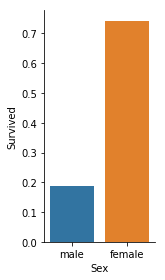

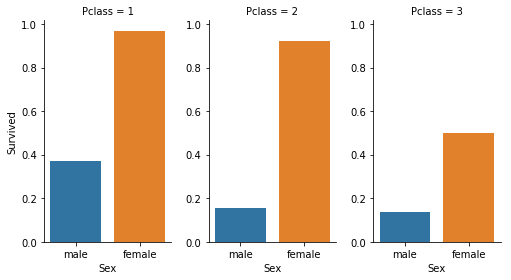

In [10]:
sns.factorplot(x = 'Sex', y = 'Survived', data = train, kind="bar",aspect =0.6,ci = None)
sns.factorplot(x="Sex", y="Survived", col="Pclass",data=train,kind="bar",ci=None, aspect=0.6)

<p>From the bar graph it is evident that the there was more than 70% chance that you could have survived the sinking Titanic if you were a FEMALE and less than 20% of MEN survived.</p>

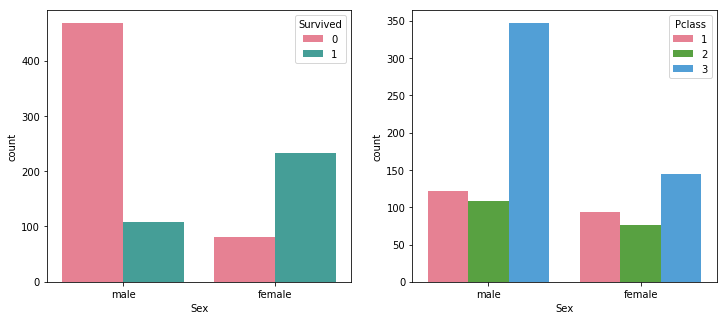

In [11]:
#lets check the count of male and female in each class then we will have idea about the percentage.
fig, ax = plt.subplots(1,2, figsize =(12,5))
sns.countplot(x='Sex',hue='Survived', data=train,palette='husl', ax = ax[0])
sns.countplot(x='Sex', hue ='Pclass', data = train,palette='husl', ax = ax[1])

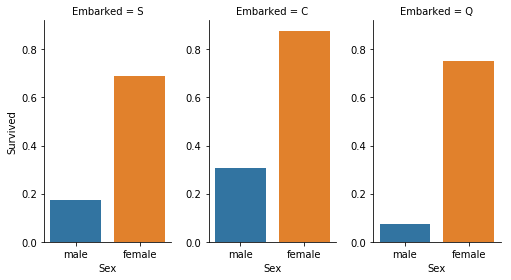

In [12]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Embarked', data=train, kind='bar', aspect=0.6, ci=None)

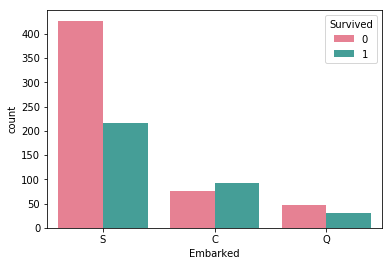

In [13]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train, palette ='husl')

<p>Survival rate is more for the people embarked from C </p>

<p><b>Now lets check if we there is any relation between gender, Embarkment and Class</b></p>

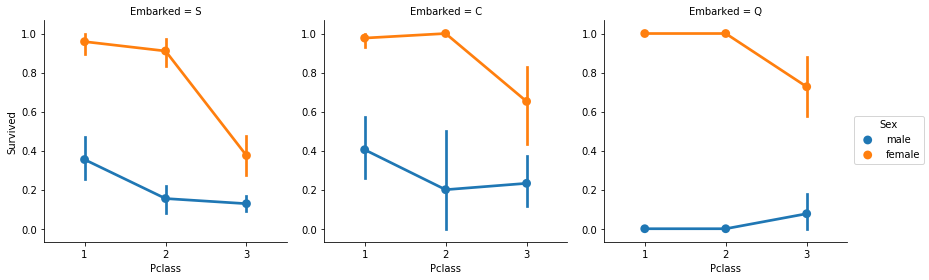

In [14]:
sns.factorplot('Pclass', 'Survived', data=train, col='Embarked', hue ='Sex', kind='point')

<p>Here we could see that </p>
 <ul>
 <li>the feamle of class 1 and class 2 who emabarked from Queenstown absolutely survived</li>
 <li>Female of class 1 and 2 have high survival rate irrespective from where they embarked</li>
 <li>Males Embarked from Queenston have lowest survival rate.</li>
 </ul>

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
print("---Age statistics for Male---")
print(train[train['Sex']=='male']['Age'].describe())
print("\n")
print("---Age statistics for Female---")
print(train[train['Sex']=='female']['Age'].describe())

---Age statistics for Male---
count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64


---Age statistics for Female---
count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64


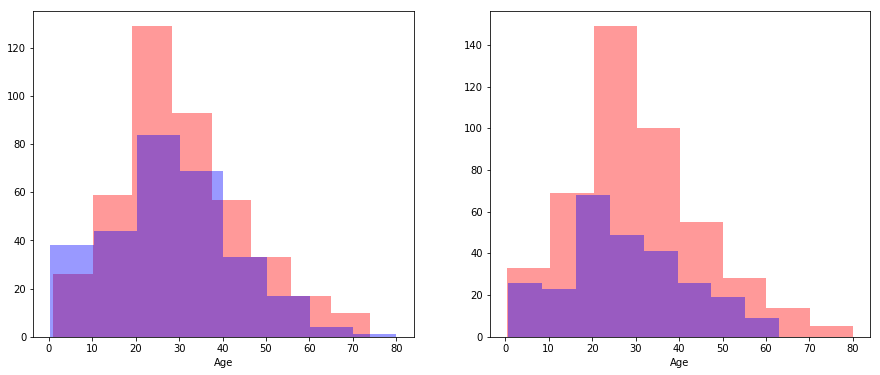

In [17]:
f,(ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
sns.distplot(train[train['Survived']==0]['Age'].dropna(),kde = False,color='r',bins=8, ax = ax1)
sns.distplot(train[train['Survived']==1]['Age'].dropna(),kde = False,color ='b',bins=8, ax = ax1)
sns.distplot(train[train['Sex']=='male']['Age'].dropna(),kde = False,color ='r',bins=8, ax = ax2)
sns.distplot(train[train['Sex']=='female']['Age'].dropna(),kde = False,color ='b',bins=8, ax = ax2)

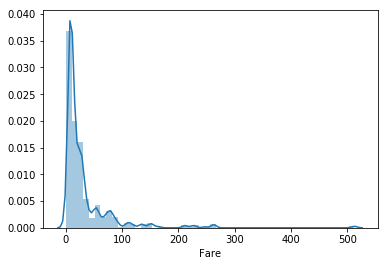

In [18]:
sns.distplot(train['Fare'])

the distribution plot of the ticket fare is right skewed... which is as expected because the their is more and cheaper seats in economy class than the higher class

<h1>Now lets fill out the Missing Values</h1>

In [19]:
alldata = train.append(test)
alldata.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
408,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
409,3.0,NaN,S,13.7750,"Peacock, Miss. Treasteall",1,1301,3,female,1,NaN,SOTON/O.Q. 3101315
410,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
411,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928
412,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


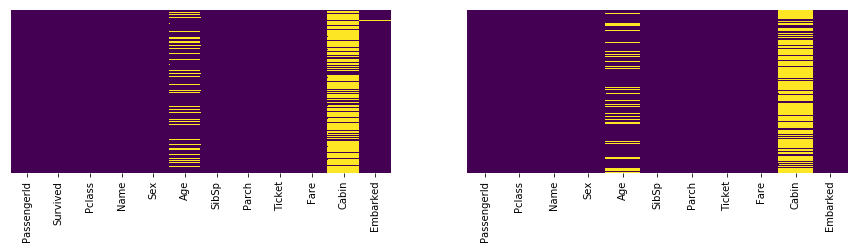

In [20]:
f,ax = plt.subplots(1,2,figsize=(15,3))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax =ax[0])
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])

<p>We could see the column cabin in both train and test datasets has around 90 percent of rows empty.</p>
<p>So, we can drop the cabin column and also its most likely that the cabin numbers would be according to the class of the passenger so we already are considering class in making the decision, therefore we can drop that</p>

<p><b>Now we will fill the missing values in Age column according to Class and gender</b></p>

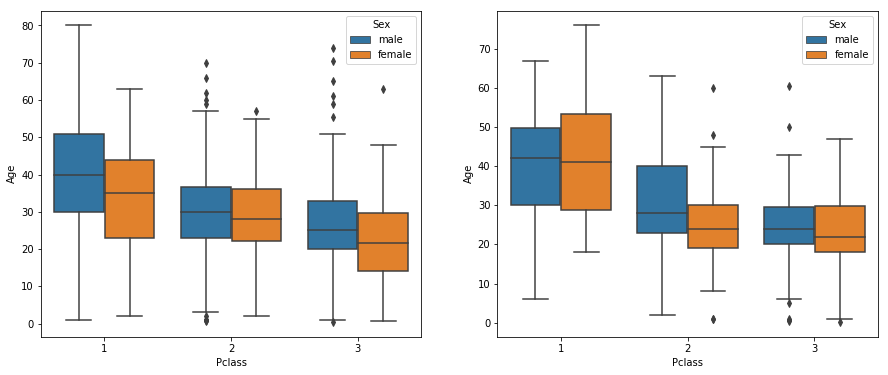

In [21]:
f, ax = plt.subplots(1,2, figsize = (15,6))
sns.boxplot(x= 'Pclass', y = 'Age',hue = 'Sex',data = train, ax = ax[0])
sns.boxplot(x= 'Pclass', y = 'Age',hue = 'Sex',data = test, ax =ax[1])

From the above box plot we can fill the age as below:<br>
<b>Train data:</b><br>
<p>class1 - male:40 and female:36<br> 
class2 - male:30 and female:28<br>
class3 - male:25 and female:23</p>

<b>Test Data:</b><br>
<p>class1 - male:43 and female:42<br> 
class2 - male:28 and female:24<br>
class3 - male:24 and female:22</p>

In [22]:
def train_fill_age(data):
    if pd.isnull(data['Age']):
        if data['Pclass']== 1 and data['Sex']=='male':
            return 40
        if data['Pclass']== 1 and data['Sex']=='female':
            return 36
        if data['Pclass']== 2 and data['Sex']=='male':
            return 30
        if data['Pclass']== 2 and data['Sex']=='female':
            return 28
        if data['Pclass']== 3 and data['Sex']=='male':
            return 25
        if data['Pclass']== 3 and data['Sex']=='female':
            return 23
    else:
        return data['Age']

def test_fill_age(data):
    if pd.isnull(data['Age']):
        if data['Pclass']== 1 and data['Sex']=='male':
            return 43
        if data['Pclass']== 1 and data['Sex']=='female':
            return 42
        if data['Pclass']== 2 and data['Sex']=='male':
            return 28
        if data['Pclass']== 2 and data['Sex']=='female':
            return 24
        if data['Pclass']== 3 and data['Sex']=='male':
            return 24
        if data['Pclass']== 3 and data['Sex']=='female':
            return 22
    else:
        return data['Age']

In [23]:
train['Age'] = train.apply(train_fill_age,axis = 1)
test['Age'] = test.apply(test_fill_age, axis = 1)

In [24]:
#we will drop the cabin column as most it has null value for almost 80%
train.drop(['Cabin'], axis = 1,inplace = True)
test.drop(['Cabin'], axis=1, inplace = True)

In [25]:
#We could see that Embarked column has two values as null. We will fill them by the mode of the column
print(train['Embarked'].value_counts(dropna = False))
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
print(train['Embarked'].value_counts(dropna = False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [26]:
print(test[pd.isnull(test['Fare'])]) #the person for whom fare is not available is travelling in class3
#so we will fill out the null value with the mean fare of class 3
test['Fare'].fillna(test[test['Pclass'] == 3]['Fare'].mean(),inplace = True)

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Embarked  
152   NaN        S  


<h1>Feature Engineering</h1>

<p><b>Feature Engineering on Age</b></p>

In [27]:
# we will create four age group and then visualize other parameters on the basis of age group
def age_group(data):
    if data < 13:
        return 1   #child
    elif data < 20:
        return 2   #teen
    elif data < 30: 
        return 3   #adult
    elif data < 55:
        return 4   #elder
    else:
        return 5 #veteran

In [28]:
#temp['Age'].dropna(inplace = True)

train['cat_age'] = train['Age'].apply(age_group)
test['cat_age'] = test['Age'].apply(age_group)

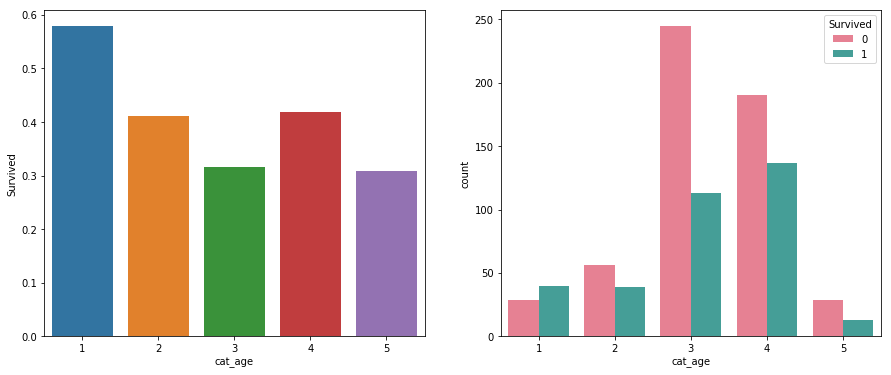

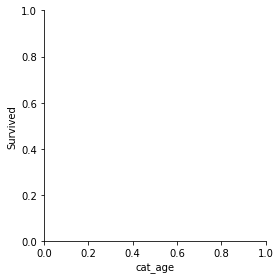

In [29]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
sns.factorplot(x= 'cat_age',y = 'Survived',data = train,kind ='bar',ci = None, ax = ax1)
sns.countplot('cat_age',hue = 'Survived',data = train, palette='husl', ax = ax2)

<p>So, from graph it is evident that percentage of survival is more in case of the group 0-13 and is around 58% succeded by age group 13-19 which is around 42%</p>

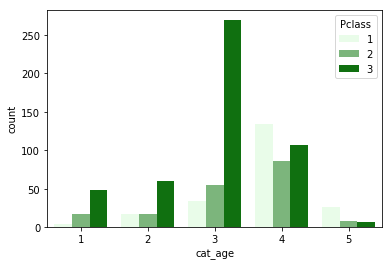

In [30]:
sns.countplot(x ='cat_age',hue = 'Pclass', data = train,color = 'g')

<p>We could see that the ratio of upper class to lower class is very high in age group 4.</p>
<p>This explains why the percentage of survival in age group 4 is even more than the younger people lying in age group 2 (less than 20yrs Old)</p>

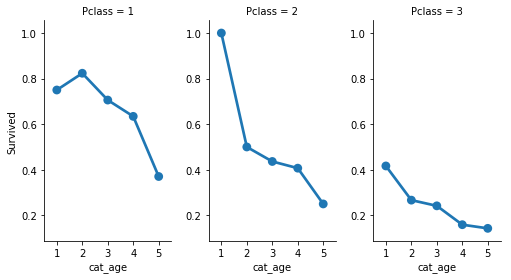

In [31]:
sns.factorplot(x= 'cat_age', y = 'Survived', col = 'Pclass',data = train, ci = None, aspect = 0.6,
                 kind = 'point')

<p>This indicates that the survival percentage is higher in class 1 except the age group 1 which is 100% in class 2.
But i guess that is obvious child in class 1 are 4, means 1 child died thats why the percentage 75.</p>
<p>We can conclude that the child are given higher priority.</p>

In [32]:
train.drop('Age', axis = 1, inplace = True)
test.drop('Age', axis = 1, inplace = True)

<b>Feature Engineering -> SibSp + parch</b>

In [33]:
train['family'] = train['SibSp'] + train['Parch'] + 1 # added one for the person himself
test['family'] = test['SibSp'] + test['Parch'] + 1

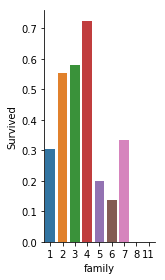

In [34]:
sns.factorplot(x = 'family', y = 'Survived', data = train, kind = 'bar',aspect = 0.6, ci = None)

<p>It doesn't look like we can coclude something. So lets make another column which will will classify a person as alone or with family</p>

In [35]:
train['isAlone'] = train['family']
train.loc[(train['isAlone']>1),'isAlone'] =0
train.loc[(train['isAlone']==1),'isAlone'] = 1

In [36]:
test['isAlone'] = test['family']
test.loc[(test['isAlone']>1),'isAlone'] =0
test.loc[(test['isAlone']==1),'isAlone'] = 1

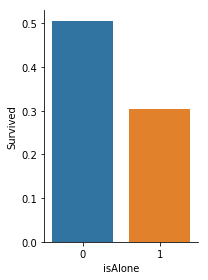

In [37]:
sns.factorplot(x='isAlone', y = 'Survived', data=train, kind = 'bar', aspect = 0.75, ci= None)

<p>So that means people who were alone had 20% less survival rate.</p>

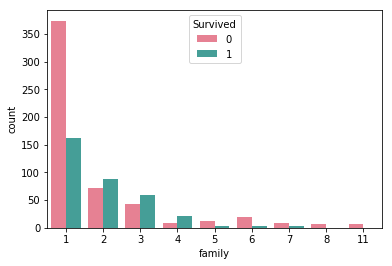

In [38]:
sns.countplot('family', hue = 'Survived', data =train, palette='husl')

In [39]:
train.drop(['family', 'SibSp', 'Parch'], axis=1, inplace = True)

In [40]:
test.drop(['family', 'SibSp', 'Parch'], axis=1, inplace = True)

<b>Feature Engineering on Name Column</b>

In [41]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Fare',
       'Embarked', 'cat_age', 'isAlone'],
      dtype='object')

In [42]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Fare', 'Embarked',
       'cat_age', 'isAlone'],
      dtype='object')

In [43]:
train[0:10]['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [44]:
train['Title'] = train['Name'].str.split(',').str[1]
print(train['Title'].head())

test['Title'] = test['Name'].str.split(',').str[1]
print(test['Title'].head())

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
Name: Title, dtype: object
0                              Mr. James
1               Mrs. James (Ellen Needs)
2                     Mr. Thomas Francis
3                             Mr. Albert
4     Mrs. Alexander (Helga E Lindqvist)
Name: Title, dtype: object


In [45]:
train['Title'] = train['Title'].str.split('.').str[0]
print(train['Title'].head(10))

test['Title'] = test['Title'].str.split('.').str[0]
print(test['Title'].head(10))

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
Name: Title, dtype: object
0       Mr
1      Mrs
2       Mr
3       Mr
4      Mrs
5       Mr
6     Miss
7       Mr
8      Mrs
9       Mr
Name: Title, dtype: object


In [46]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Don               1
 Jonkheer          1
 Sir               1
 the Countess      1
 Lady              1
 Mme               1
 Ms                1
 Capt              1
Name: Title, dtype: int64
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Dona        1
 Ms          1
 Dr          1
Name: Title, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

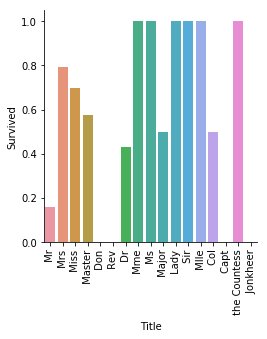

In [47]:
sns.factorplot(x = 'Title', y ='Survived', data = train,kind = 'bar',aspect = 1, ci = None)
plt.xticks(rotation = 90)

<p>We will convert <b>Mlle, Ms </b>to<b> Miss</b>,<b> Mme, lady </b>to<b>Mrs </b> and <b>Sir </b>to<b> Mr</b> and rest of titles to <b> others</b></p> 

In [48]:
train['Title'].replace(to_replace=[' Mlle',' Ms'],value=' Miss',inplace = True)
train['Title'].replace(to_replace=[' Mme',' Lady'],value=' Mrs',inplace = True)
train['Title'].replace(to_replace=' Sir',value=' Mr',inplace = True)
train['Title'].replace(to_replace =[' Dr',' Rev',' Col',' Major',' Dona',' Don',' Jonkheer',' Capt',' the Countess'],value=' Others',inplace=True)

In [49]:
test['Title'].replace(to_replace=[' Mlle',' Ms'],value=' Miss',inplace = True)
test['Title'].replace(to_replace=[' Mme',' Lady'],value=' Mrs',inplace = True)
test['Title'].replace(to_replace=' Sir',value=' Mr',inplace = True)
test['Title'].replace(to_replace =[' Dr',' Rev',' Col',' Major',' Dona',' Don',' Jonkheer',' Capt',' the Countess'],value=' Others',inplace=True)

In [50]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Others'], dtype=object)

In [51]:
print(train['Title'].value_counts())
print("==========")
print(test['Title'].value_counts())

 Mr        518
 Miss      185
 Mrs       127
 Master     40
 Others     21
Name: Title, dtype: int64
 Mr        240
 Miss       79
 Mrs        72
 Master     21
 Others      6
Name: Title, dtype: int64


In [52]:
train.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

In [53]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Ticket', 'Fare',
       'Embarked', 'cat_age', 'isAlone', 'Title'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Fare', 'Embarked', 'cat_age',
       'isAlone', 'Title'],
      dtype='object')


In [54]:
#before we go further we will drop the Ticket column
train.drop('Ticket',axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [55]:
alldata = pd.concat([train,test])

In [56]:
alldata.tail(10)

,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,cat_age,isAlone
408,Q,7.7208,1300,3,female,NaN,Miss,3,1
409,S,13.7750,1301,3,female,NaN,Miss,1,0
410,Q,7.7500,1302,3,female,NaN,Miss,3,1
411,Q,90.0000,1303,1,female,NaN,Mrs,4,0
412,S,7.7750,1304,3,female,NaN,Miss,3,1
413,S,8.0500,1305,3,male,NaN,Mr,3,1
414,C,108.9000,1306,1,female,NaN,Others,4,1
415,S,7.2500,1307,3,male,NaN,Mr,4,1
416,S,8.0500,1308,3,male,NaN,Mr,3,1
417,C,22.3583,1309,3,male,NaN,Master,3,0


In [57]:
alldata['Fare'].values

array([  7.25  ,  71.2833,   7.925 , ...,   7.25  ,   8.05  ,  22.3583])

In [58]:
#Scaling
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, Normalizer
scaler = MinMaxScaler()
alldata['Fare']  = scaler.fit_transform(alldata['Fare'].reshape(-1,1))

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


<b>Final Data Preparation for prediction</b>

In [59]:
def process_dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],prefix=col,drop_first=False)
        df = pd.concat([df.drop(col,axis=1),dummies],axis=1)
    return df

In [60]:
alldata1 = process_dummies(alldata,['Embarked','Sex','Title','cat_age'])

In [61]:
alldata1.head()

,Fare,PassengerId,Pclass,Survived,isAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others,cat_age_1,cat_age_2,cat_age_3,cat_age_4,cat_age_5
0,0.014151,1,3,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
1,0.139136,2,1,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0.015469,3,3,1.0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
3,0.103644,4,1,1.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.015713,5,3,0.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0


In [62]:
len(train)

891

In [63]:
final_train = alldata1.iloc[0:891,:]
len(final_train)

891

In [64]:
final_train.drop('PassengerId', axis =1, inplace =True)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
final_train.tail(10)

,Fare,Pclass,Survived,isAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others,cat_age_1,cat_age_2,cat_age_3,cat_age_4,cat_age_5
881,0.015412,3,0.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
882,0.020527,3,0.0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
883,0.020495,2,0.0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
884,0.013761,3,0.0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
885,0.056848,3,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
886,0.025374,2,0.0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
887,0.058556,1,1.0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
888,0.045771,3,0.0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
889,0.058556,1,1.0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
890,0.015127,3,0.0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [66]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
Fare             891 non-null float64
Pclass           891 non-null int64
Survived         891 non-null float64
isAlone          891 non-null int64
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
Sex_female       891 non-null uint8
Sex_male         891 non-null uint8
Title_ Master    891 non-null uint8
Title_ Miss      891 non-null uint8
Title_ Mr        891 non-null uint8
Title_ Mrs       891 non-null uint8
Title_ Others    891 non-null uint8
cat_age_1        891 non-null uint8
cat_age_2        891 non-null uint8
cat_age_3        891 non-null uint8
cat_age_4        891 non-null uint8
cat_age_5        891 non-null uint8
dtypes: float64(2), int64(2), uint8(15)
memory usage: 47.9 KB


In [67]:
final_test = alldata1.iloc[len(train):,:]

In [68]:
final_test.head()

,Fare,PassengerId,Pclass,Survived,isAlone,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Others,cat_age_1,cat_age_2,cat_age_3,cat_age_4,cat_age_5
0,0.015282,892,3,NaN,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0.013663,893,3,NaN,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,0.018909,894,2,NaN,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
3,0.016908,895,3,NaN,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,0.023984,896,3,NaN,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0


In [69]:
test_id = final_test['PassengerId']
final_test.drop(['PassengerId','Survived'],axis = 1, inplace=True)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 18 columns):
Fare             418 non-null float64
Pclass           418 non-null int64
isAlone          418 non-null int64
Embarked_C       418 non-null uint8
Embarked_Q       418 non-null uint8
Embarked_S       418 non-null uint8
Sex_female       418 non-null uint8
Sex_male         418 non-null uint8
Title_ Master    418 non-null uint8
Title_ Miss      418 non-null uint8
Title_ Mr        418 non-null uint8
Title_ Mrs       418 non-null uint8
Title_ Others    418 non-null uint8
cat_age_1        418 non-null uint8
cat_age_2        418 non-null uint8
cat_age_3        418 non-null uint8
cat_age_4        418 non-null uint8
cat_age_5        418 non-null uint8
dtypes: float64(1), int64(2), uint8(15)
memory usage: 19.2 KB


In [71]:
#splitting the dataset
Y = final_train['Survived'].astype('int')
X = final_train.drop(['Survived'],axis=1)

In [72]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [78]:
model = RandomForestClassifier(random_state = 1)
scores = cross_val_score(model,X,Y,scoring ='accuracy', cv = 5)
scores.mean()

0.80818338406411561

In [74]:
model1 = RandomForestClassifier(random_state = 1)
model1.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [77]:
predictions = model.predict(final_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [76]:
submission = pd.DataFrame({
    'PassengerId': test_id,
    'Survived': predictions
})

submission.to_csv('submission.csv',index=False)